In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input
import tkinter as tk
from PIL import Image, ImageDraw
from scipy.ndimage import gaussian_filter

In [38]:
(x,y),(xt,yt)=keras.datasets.mnist.load_data()

In [39]:
x=x/255.  
print(x.shape)
print(y.shape)
y_train=keras.utils.to_categorical(y,10)# encode Ys to one hot table
y_test=keras.utils.to_categorical(yt,10)

(60000, 28, 28)
(60000,)


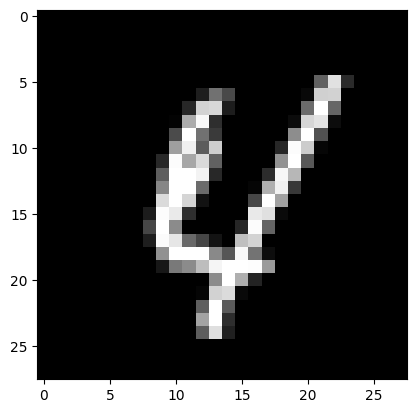

In [40]:
plt.imshow(x[700,:,:],cmap='gray')
plt.show()

In [41]:
def convolutional_neural_network():
    model=keras.Sequential([
        
        
        
        Input(shape=(28,28,1)),
        
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),      
        
        Dense(128,activation='relu',name='layer1'),
        Dense(64,activation='relu',name='layer2'),                         #FC layers
        Dense(10,activation='softmax',name='output')
        
        
    ])
    model.summary()
    return model

In [42]:
model=convolutional_neural_network()
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
histo=model.fit(x,y_train,epochs=10)

model.evaluate(xt,y_test)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9021 - loss: 0.3209
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9842 - loss: 0.0512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9899 - loss: 0.0318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0.0232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9944 - loss: 0.0177
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9962 - loss: 0.0120
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9971 - loss: 0.0091
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9977 - loss: 0.0067
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9974 - loss: 0.0074
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 19.6761


[15.917160987854004, 0.9866999983787537]

dict_keys(['accuracy', 'loss'])


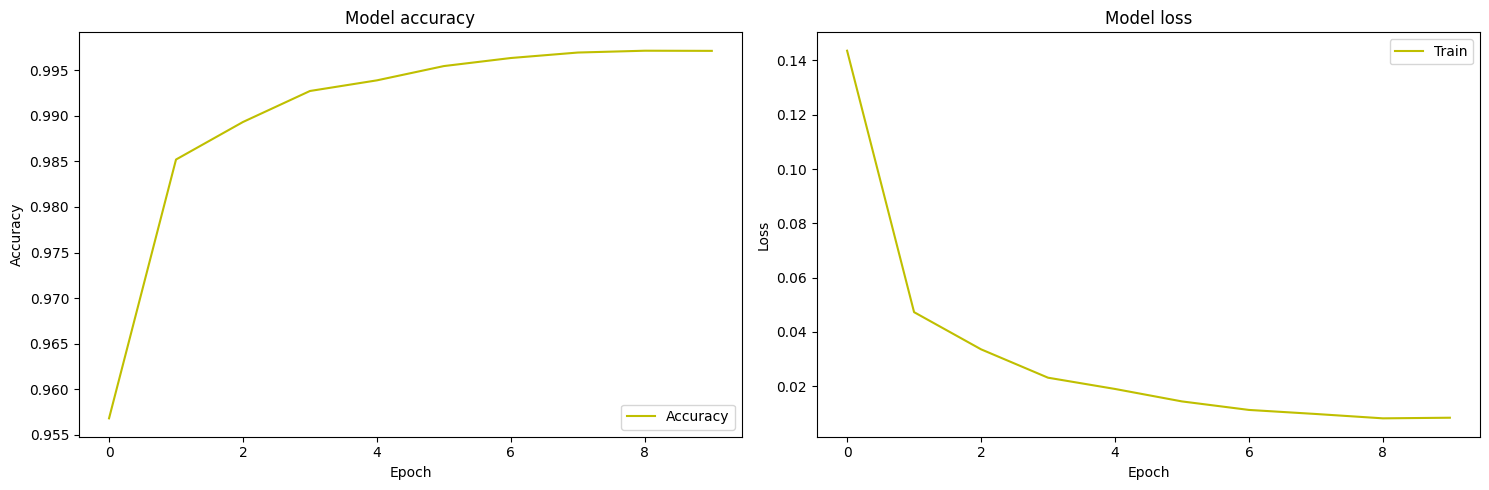

In [99]:
history_dict = histo.history
print(history_dict.keys())

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

# Accuracy plot
ax1.plot(history_dict['accuracy'],label='Accuracy',c='y')
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

# Loss plot
ax2.plot(history_dict['loss'],label='Train',c='y')
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted digit is: 6 with probability of  [0.9877378]


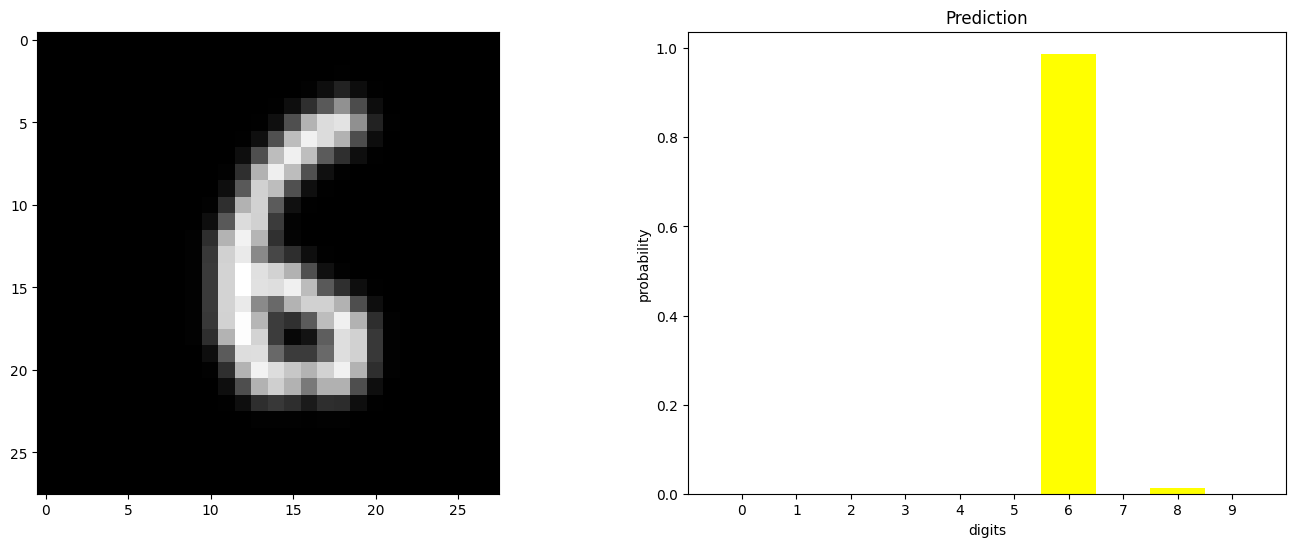

In [108]:
class DigitDrawer:
    def __init__(self):
        self.root=tk.Tk()
        self.root.title("Draw a Digit")
        
        self.canvas=tk.Canvas(self.root,width=280,height=280,bg="white")
        self.canvas.pack()

        self.canvas.bind('<B1-Motion>', self.paint)
        self.canvas.bind('<ButtonRelease-1>', self.reset)

        self.image = Image.new("L", (28, 28), "white")
        self.draw = ImageDraw.Draw(self.image)
        
        self.done_button = tk.Button(self.root, text="Done", command=self.finish_drawing)
        self.done_button.pack()
        

        self.digit_array = None

    def paint(self, event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        self.canvas.create_oval(x1, y1, x2, y2, fill="white", width=20)
        self.draw.line([x1/10, y1/10, x2/10, y2/10], fill="black", width=2)

    def reset(self, event):
        pass

    def finish_drawing(self):
        np.save('self digit_array.npy', self.image)
        img_array = np.array(self.image)
        self.digit_array =1-img_array.reshape(28, 28, 1) / 255.0
        self.root.quit()

def draw_digit():
    drawer = DigitDrawer()
    drawer.root.mainloop()
    drawer.root.destroy()
    return drawer.digit_array
def convolve(image):
    blurred_image=gaussian_filter(image, sigma=0.7)             # use the gaussian filter for blurring 
    return blurred_image


digit_image = draw_digit()
digit_image=convolve(digit_image)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,6))

if digit_image is not None:
    ax1.imshow(digit_image.reshape(28, 28), cmap='gray')
    #plt.show()
    digit_image=np.expand_dims(digit_image, axis=0) 
    prediction=model.predict(digit_image)
    print("Predicted digit is:",np.argmax(prediction),"with probability of ",prediction[:,np.argmax(prediction)])
    
    a=np.linspace(0,9,10)
    ax2.bar(a,height=prediction[:,].T.flatten(),width=1,color='yellow')
    ax2.set_xticks(range(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax2.set_title("Prediction") 
    ax2.set_xlabel('digits')
    ax2.set_ylabel('probability')


plt.show()
    
    
    
